In [1]:
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def csv_to_kvs(fileName):
    make_dictionary = {}
    with open(fileName,'r') as csvFile:
        csvreader = csv.reader(csvFile)
        for row in csvreader:
            #position 1 and following are integers
            make_dictionary[row[0]] = [int(val) for val in row[1:]]
        print(make_dictionary)
    return make_dictionary

C36=csv_to_kvs('C_36all.csv')  


print(len(C36.keys()))

keysListC36 = list(C36.keys()) 
print(keysListC36)

{'123.456': [123, 253, 354, 134, 146, 456, 265, 162], '123.465': [152, 123, 134, 145, 465, 364, 263, 256], '123.546': [123, 243, 345, 135, 156, 465, 264, 162], '123.564': [154, 142, 123, 135, 365, 263, 246, 456], '123.645': [243, 123, 152, 254, 456, 165, 136, 346], '123.654': [245, 253, 123, 142, 164, 136, 356, 465], '124.356': [143, 124, 254, 345, 356, 265, 162, 136], '124.365': [152, 124, 143, 135, 365, 346, 264, 256], '124.536': [354, 145, 124, 234, 263, 162, 156, 365], '124.563': [153, 132, 124, 145, 465, 264, 236, 356], '124.635': [124, 152, 253, 234, 364, 356, 165, 146], '124.653': [124, 132, 235, 254, 456, 365, 163, 146], '125.346': [245, 354, 153, 125, 162, 136, 346, 264], '125.364': [153, 134, 142, 125, 265, 246, 364, 356], '125.436': [235, 345, 154, 125, 162, 146, 364, 263], '125.463': [154, 143, 132, 125, 265, 236, 346, 456], '125.634': [243, 235, 125, 142, 164, 156, 365, 346], '125.643': [245, 125, 132, 234, 364, 163, 156, 465], '126.345': [152, 135, 345, 254, 246, 364, 163

In [2]:
%run module2x2x2_ext_match.ipynb

from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-11


# Number fo buildable cubes using sets of 9 cubes 

## Two new functions

**RandomKCubes**(dictionary, k)
dictionary = dictionary of cubes
k = set of size k
output: a random selection of k cubes from dictionary

**NumberBuildable4aSetNINECubes**(a_collection_of_nine_cubes, dictionary_possible_targets_to_build)
a_collection_of_nine_cubes is the output of RandomKCubes
output: the number of cubes in dictionary_possible_targets_to_build that are buildable with a_collection_of_nine_cubes

In [6]:
#Example.  
CollectionOfNine = RandomKCubes(C36, 9)
NumberBuildable4aSetNINECubes(CollectionOfNine, C36)

4

In [7]:
#NOTE: this code is also in module2x2x2_ext_match
def DistributionBuildNum4SetsOfNine(dictionary_sets, number_samples):
    list_numberBuildable=[]
    for i in range(number_samples):
        nine_set = RandomKCubes(dictionary_sets, 9)
        n = NumberBuildable4aSetNINECubes(nine_set, dictionary_sets)
        list_numberBuildable.append(n)
        if n==8:
            print(nine_set)
        
    return list_numberBuildable

[[143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [354, 145, 124, 234, 263, 162, 156, 365], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [153, 354, 234, 132, 126, 246, 456, 165], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126], [235, 345, 154, 125, 162, 146, 364, 263]]
[[245, 253, 123, 142, 164, 136, 356, 465], [245, 125, 132, 234, 364, 163, 156, 465], [152, 124, 143, 135, 365, 346, 264, 256], [243, 235, 125, 142, 164, 156, 365, 346], [354, 145, 124, 234, 263, 162, 156, 365], [153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [143, 345, 235, 132, 126, 256, 465, 164], [154, 143, 132, 125, 265, 236, 346, 456]]
[[153, 354, 234, 132, 126, 246, 456, 165], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [243, 235, 125, 142, 164, 156, 365, 346], [245, 154, 135, 253, 236, 163, 146, 264], [152, 124, 143, 135, 365, 346, 

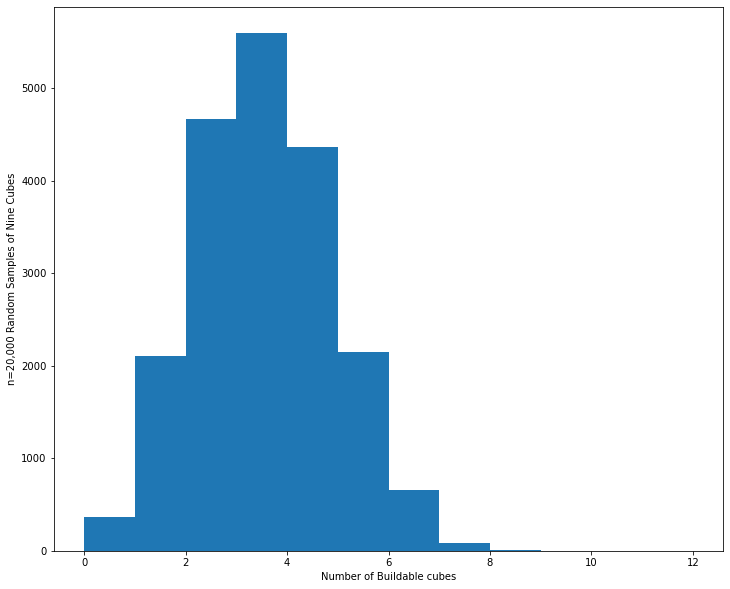

 8 :  9
 7 :  87
 6 :  659
 5 :  2146
 4 :  4363
 3 :  5599
 2 :  4668
 1 :  2106
 0 :  363
the average number of buildable cubes is 3.0528
the standard deviation of the number of buildable cubes is 1.3564675300972044


In [21]:
import statistics

a = DistributionBuildNum4SetsOfNine(C36, 20000)
#print(a)

#histogram
fig, ax=plt.subplots(figsize=(12,10))
ax.hist(a, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Number of Buildable cubes")
plt.ylabel("n=20,000 Random Samples of Nine Cubes")
plt.show()

CountFrequency(a)

print("the average number of buildable cubes is", statistics.mean(a))
print("the standard deviation of the number of buildable cubes is", statistics.stdev(a)) 

In [31]:
#Sets of Nine cubes with 8 buildable targets.  Conjecture 8 targets is max buildable for sets of 9
#7 sets of nine
MaxBuildables0=[[[153, 134, 142, 125, 265, 246, 364, 356], [245, 154, 135, 253, 236, 163, 146, 264], [152, 145, 354, 253, 236, 346, 164, 126], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126], [245, 125, 132, 234, 364, 163, 156, 465], [123, 243, 345, 135, 156, 465, 264, 162], [354, 245, 142, 134, 163, 126, 256, 365]],
[[143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [143, 124, 254, 345, 356, 265, 162, 136], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [143, 345, 235, 132, 126, 256, 465, 164], [243, 235, 125, 142, 164, 156, 365, 346], [153, 134, 142, 125, 265, 246, 364, 356], [245, 154, 135, 253, 236, 163, 146, 264]],
[[124, 132, 235, 254, 456, 365, 163, 146], [245, 253, 123, 142, 164, 136, 356, 465], [153, 134, 142, 125, 265, 246, 364, 356], [152, 145, 354, 253, 236, 346, 164, 126], [243, 123, 152, 254, 456, 165, 136, 346], [245, 125, 132, 234, 364, 163, 156, 465], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [354, 245, 142, 134, 163, 126, 256, 365]],
[[245, 154, 135, 253, 236, 163, 146, 264], [354, 245, 142, 134, 163, 126, 256, 365], [153, 354, 234, 132, 126, 246, 456, 165], [152, 135, 345, 254, 246, 364, 163, 126], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [243, 142, 154, 345, 356, 165, 126, 236], [152, 145, 354, 253, 236, 346, 164, 126], [153, 134, 142, 125, 265, 246, 364, 356]],
[[243, 235, 125, 142, 164, 156, 365, 346], [143, 124, 254, 345, 356, 265, 162, 136], [154, 143, 132, 125, 265, 236, 346, 456], [143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [123, 243, 345, 135, 156, 465, 264, 162], [153, 235, 243, 134, 146, 264, 256, 165], [152, 135, 345, 254, 246, 364, 163, 126], [235, 153, 145, 254, 246, 164, 136, 263]],
[[245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263], [143, 345, 235, 132, 126, 256, 465, 164], [243, 123, 152, 254, 456, 165, 136, 346], [152, 135, 345, 254, 246, 364, 163, 126], [354, 145, 124, 234, 263, 162, 156, 365], [245, 354, 153, 125, 162, 136, 346, 264], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456]],
[[245, 253, 123, 142, 164, 136, 356, 465], [153, 235, 243, 134, 146, 264, 256, 165], [152, 124, 143, 135, 365, 346, 264, 256], [143, 154, 245, 234, 263, 256, 165, 136], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263], [243, 142, 154, 345, 356, 165, 126, 236], [152, 145, 354, 253, 236, 346, 164, 126], [245, 125, 132, 234, 364, 163, 156, 465]]]

#Another (possibly with duplicates, but none when checked) set of sets of nine cubes with 8 buildable targets.
#6 sets of nine
MaxBuildables1 =[[[143, 154, 245, 234, 263, 256, 165, 136], [245, 354, 153, 125, 162, 136, 346, 264], [354, 145, 124, 234, 263, 162, 156, 365], [143, 345, 235, 132, 126, 256, 465, 164], [243, 123, 152, 254, 456, 165, 136, 346], [243, 142, 154, 345, 356, 165, 126, 236], [153, 132, 124, 145, 465, 264, 236, 356], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164]],
[[354, 145, 124, 234, 263, 162, 156, 365], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164], [143, 234, 253, 135, 156, 265, 246, 164], [243, 235, 125, 142, 164, 156, 365, 346], [243, 254, 145, 134, 163, 156, 265, 236], [153, 134, 142, 125, 265, 246, 364, 356], [245, 253, 123, 142, 164, 136, 356, 465], [152, 135, 345, 254, 246, 364, 163, 126]],
[[143, 234, 253, 135, 156, 265, 246, 164], [152, 145, 354, 253, 236, 346, 164, 126], [153, 235, 243, 134, 146, 264, 256, 165], [143, 154, 245, 234, 263, 256, 165, 136], [154, 142, 123, 135, 365, 263, 246, 456], [124, 132, 235, 254, 456, 365, 163, 146], [245, 354, 153, 125, 162, 136, 346, 264], [153, 354, 234, 132, 126, 246, 456, 165], [152, 124, 143, 135, 365, 346, 264, 256]],
[[245, 354, 153, 125, 162, 136, 346, 264], [123, 253, 354, 134, 146, 456, 265, 162], [154, 142, 123, 135, 365, 263, 246, 456], [243, 142, 154, 345, 356, 165, 126, 236], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164]],
[[123, 253, 354, 134, 146, 456, 265, 162], [354, 145, 124, 234, 263, 162, 156, 365], [143, 154, 245, 234, 263, 256, 165, 136], [245, 253, 123, 142, 164, 136, 356, 465], [154, 142, 123, 135, 365, 263, 246, 456], [152, 124, 143, 135, 365, 346, 264, 256], [152, 135, 345, 254, 246, 364, 163, 126], [243, 142, 154, 345, 356, 165, 126, 236], [243, 254, 145, 134, 163, 156, 265, 236]],
[[153, 134, 142, 125, 265, 246, 364, 356], [245, 354, 153, 125, 162, 136, 346, 264], [354, 145, 124, 234, 263, 162, 156, 365], [153, 354, 234, 132, 126, 246, 456, 165], [153, 235, 243, 134, 146, 264, 256, 165], [245, 125, 132, 234, 364, 163, 156, 465], [245, 253, 123, 142, 164, 136, 356, 465], [152, 145, 354, 253, 236, 346, 164, 126], [124, 132, 235, 254, 456, 365, 163, 146]]]

#4 sets of nine 
MaxBuildables2=[[[235, 345, 154, 125, 162, 146, 364, 263], [245, 354, 153, 125, 162, 136, 346, 264], [152, 123, 134, 145, 465, 364, 263, 256], [245, 253, 123, 142, 164, 136, 356, 465], [143, 234, 253, 135, 156, 265, 246, 164], [243, 123, 152, 254, 456, 165, 136, 346], [354, 145, 124, 234, 263, 162, 156, 365], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164]],
[[124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264], [235, 153, 145, 254, 246, 164, 136, 263], [154, 143, 132, 125, 265, 236, 346, 456], [354, 145, 124, 234, 263, 162, 156, 365], [245, 154, 135, 253, 236, 163, 146, 264], [153, 354, 234, 132, 126, 246, 456, 165]],
[[143, 154, 245, 234, 263, 256, 165, 136], [152, 123, 134, 145, 465, 364, 263, 256], [235, 153, 145, 254, 246, 164, 136, 263], [245, 154, 135, 253, 236, 163, 146, 264], [123, 243, 345, 135, 156, 465, 264, 162], [124, 152, 253, 234, 364, 356, 165, 146], [243, 254, 145, 134, 163, 156, 265, 236], [153, 134, 142, 125, 265, 246, 364, 356], [143, 345, 235, 132, 126, 256, 465, 164]],
[[152, 124, 143, 135, 365, 346, 264, 256], [354, 145, 124, 234, 263, 162, 156, 365], [245, 253, 123, 142, 164, 136, 356, 465], [235, 345, 154, 125, 162, 146, 364, 263], [123, 253, 354, 134, 146, 456, 265, 162], [245, 354, 153, 125, 162, 136, 346, 264], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [243, 254, 145, 134, 163, 156, 265, 236]]]


#5 sets of nine (possibly with duplicates seen above)
MaxBuildables3=[[[152, 145, 354, 253, 236, 346, 164, 126], [235, 153, 145, 254, 246, 164, 136, 263], [123, 243, 345, 135, 156, 465, 264, 162], [154, 142, 123, 135, 365, 263, 246, 456], [354, 145, 124, 234, 263, 162, 156, 365], [153, 235, 243, 134, 146, 264, 256, 165], [153, 134, 142, 125, 265, 246, 364, 356], [245, 125, 132, 234, 364, 163, 156, 465], [154, 143, 132, 125, 265, 236, 346, 456]],
[[245, 154, 135, 253, 236, 163, 146, 264], [123, 253, 354, 134, 146, 456, 265, 162], [123, 243, 345, 135, 156, 465, 264, 162], [153, 134, 142, 125, 265, 246, 364, 356], [243, 235, 125, 142, 164, 156, 365, 346], [245, 125, 132, 234, 364, 163, 156, 465], [143, 154, 245, 234, 263, 256, 165, 136], [143, 345, 235, 132, 126, 256, 465, 164], [245, 354, 153, 125, 162, 136, 346, 264]],
[[124, 132, 235, 254, 456, 365, 163, 146], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256], [152, 145, 354, 253, 236, 346, 164, 126], [243, 142, 154, 345, 356, 165, 126, 236], [235, 153, 145, 254, 246, 164, 136, 263], [123, 243, 345, 135, 156, 465, 264, 162], [245, 125, 132, 234, 364, 163, 156, 465], [143, 124, 254, 345, 356, 265, 162, 136]],
[[153, 134, 142, 125, 265, 246, 364, 356], [153, 354, 234, 132, 126, 246, 456, 165], [245, 253, 123, 142, 164, 136, 356, 465], [124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [152, 145, 354, 253, 236, 346, 164, 126], [123, 253, 354, 134, 146, 456, 265, 162], [154, 142, 123, 135, 365, 263, 246, 456], [153, 235, 243, 134, 146, 264, 256, 165]],
[[153, 354, 234, 132, 126, 246, 456, 165], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [243, 235, 125, 142, 164, 156, 365, 346], [123, 253, 354, 134, 146, 456, 265, 162], [143, 154, 245, 234, 263, 256, 165, 136], [153, 134, 142, 125, 265, 246, 364, 356], [245, 154, 135, 253, 236, 163, 146, 264], [143, 345, 235, 132, 126, 256, 465, 164]]]

In [65]:
list_of_nines3 = CubeCornersToNames(MaxBuildables2, C36)
print(list_of_nines3)

[['125.436', '125.346', '123.465', '123.654', '135.624', '123.645', '124.536', '134.526', '126.453'], ['124.635', '126.345', '126.453', '125.346', '136.425', '125.463', '124.536', '135.426', '126.543'], ['136.524', '123.465', '136.425', '135.426', '123.546', '124.635', '134.526', '125.364', '126.453'], ['124.365', '124.536', '123.654', '125.436', '123.456', '125.346', '126.354', '123.546', '134.526']]


## Displaying sets of 9 cubes that build 8 targets 

The tableau is depicted with 9 cubes in dark blue and blank diagonal entries in yellow.

these cubes are Buildable:
['123.456', '123.465', '123.546', '124.356', '124.536', '125.346', '125.634', '135.426']
the original set of cubes


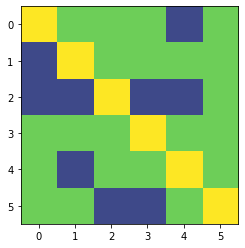

the set of buildable targets


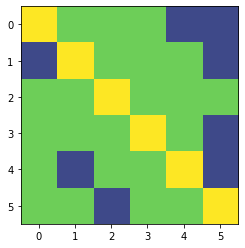

********************************************


In [19]:
lists_ofNine= [['125.436', '125.346', '123.465', '123.654', '135.624', '123.645', '124.536', '134.526', '126.453'], ['124.635', '126.345', '126.453', '125.346', '136.425', '125.463', '124.536', '135.426', '126.543'], ['136.524', '123.465', '136.425', '135.426', '123.546', '124.635', '134.526', '125.364', '126.453'], ['124.365', '124.536', '123.654', '125.436', '123.456', '125.346', '126.354', '123.546', '134.526']]
lis=lists_ofNine[3]
DisplaySetCubesandBuildableTargets(lis, C36)
print("********************************************")

these cubes are Buildable:
['124.563', '124.653', '125.436', '125.643', '126.435', '126.543', '135.624', '136.524']
the original set of cubes


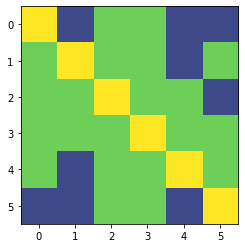

the set of buildable targets


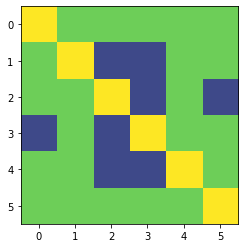

********************************************


In [18]:
lists_ofNine= [['125.436', '125.346', '123.465', '123.654', '135.624', '123.645', '124.536', '134.526', '126.453'], ['124.635', '126.345', '126.453', '125.346', '136.425', '125.463', '124.536', '135.426', '126.543'], ['136.524', '123.465', '136.425', '135.426', '123.546', '124.635', '134.526', '125.364', '126.453'], ['124.365', '124.536', '123.654', '125.436', '123.456', '125.346', '126.354', '123.546', '134.526']]
lis=lists_ofNine[1]
DisplaySetCubesandBuildableTargets(lis, C36)
print("********************************************")

Code below less important

In [62]:
#TESTING CODE
# the frequencies below are an approximation to the distributions seen below (***)
KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}

list_numberBuildable=[]
for i in range(20):
    #CollectionOfNineHaraguchi = RandomKCubes(SubDictHaraguchi, 9)
    n=NumberBuildable4aSetNINECubes(RandomKCubes(SubDictHaraguchi, 9), C36)
    list_numberBuildable.append(n)
    
CountFrequency(list_numberBuildable)


 3 :  8
 1 :  6
 0 :  6


In [61]:
#the distribution for 9 cubes is approximated above by random samples of 9 Haraguchi cubes, see above (***)
KeysHaraguchi=["126.453", "125.364", "136.524", "134.526", "124.365", "123.456", "134.625", "124.356", "123.465", "125.463", "126.354", "135.624"]
SubDictHaraguchi={key: C36[key] for key in KeysHaraguchi}


Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 12)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 11)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 10)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 9)

Distribution4NumberBuildableCubes(SubDictHaraguchi, C36, 8)

there are 1 sets of 12 cubes
 30 :  1
there are 12 sets of 11 cubes
 18 :  12
there are 66 sets of 10 cubes
 9 :  12
 8 :  36
 6 :  6
 3 :  12
there are 220 sets of 9 cubes
 3 :  112
 1 :  72
 0 :  36
there are 495 sets of 8 cubes
 3 :  36
 1 :  18
 0 :  441


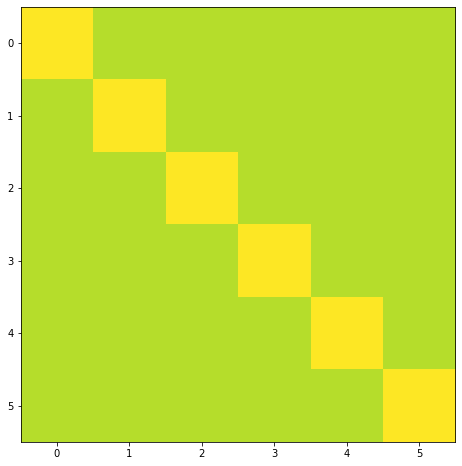

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D array of values
#values = np.random.randint(0, 100, (6, 6))
blank_canvas = np.array([[90, 80, 80, 80, 80, 80], [80,90,80,80,80,80],[80,80,90,80,80,80], [80,80,80,90,80,80], [80,80,80,80,90,80], [80,80,80,80,80,90]])

# Define the color ranges and corresponding colors
cmap = plt.cm.get_cmap('viridis', 10)
bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
norm = plt.Normalize(min(bounds), max(bounds))
colors = cmap(norm(bounds))

# Create the colored grid
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(blank_canvas, cmap=cmap, norm=norm)

# Add a colorbar
#cbar = fig.colorbar(im, ticks=bounds, boundaries=bounds, cmap=cmap)
#cbar.ax.set_yticklabels([f'{b}' for b in bounds])

# Show the plot
plt.show()

# this displays the tableau grid, yellow is a blank, green is a cube
# cubes that are selected are dark blue

TypeError: Image data of dtype object cannot be converted to float

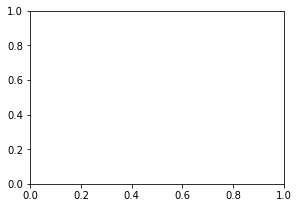

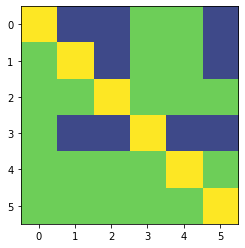

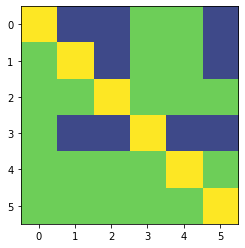

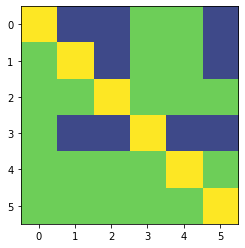

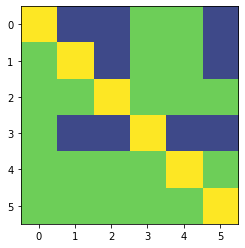

In [48]:
# code for displaying multiple images in one figure 

#import libraries 
#import cv2 
from matplotlib import pyplot as plt 

# create figure 
fig = plt.figure(figsize=(10, 7)) 

# setting values to rows and column variables 
rows = 2
columns = 2

# reading images 
Image1 = displayCubes(list_of_nines[1])
Image2 = displayCubes(list_of_nines[1]) 
Image3 = displayCubes(list_of_nines[1])
Image4 = displayCubes(list_of_nines[1]) 

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 

# showing image 
plt.imshow(Image1) 
plt.axis('off') 
plt.title("First") 

# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 

# showing image 
plt.imshow(Image2) 
plt.axis('off') 
plt.title("Second") 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 

# showing image 
plt.imshow(Image3) 
plt.axis('off') 
plt.title("Third") 

# Adds a subplot at the 4th position 
fig.add_subplot(rows, columns, 4) 

# showing image 
plt.imshow(Image4) 
plt.axis('off') 
plt.title("Fourth") 



In [63]:
#Investigating a set of nine 
# from which 8 cubes can be built
#Investigating a collection of 8  from the minimal universal set (studied above) 
# from which three cubes can be built
example_nine=['136.524', '125.346', '124.536', '126.453', '123.645', '126.534', '124.563', '125.634', '135.624']
Collections=list(it.combinations(example_nine, 8))
current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
       
for coll in Collections:
    eight_cubes=[C36[key] for key in coll]

    a_solution_list=[]
    for j in list(C36.keys()): 
        a_solution_list.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
    
        
    newarray = np.array([w for w in a_solution_list])
    current_solution_array = current_solution_array + newarray
    current_solution_list = [num for num in current_solution_array]
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
print(current_solution_list)    
    

[0, 0, 2, 0, 0, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 4, 0]


['123.456', '123.465', **'123.546'**, '123.564', '123.645', **'123.654'**, **'124.356'**, **'124.365'**, '124.536', '124.563', '124.635', '124.653', '125.346', '125.364', '125.436', **'125.463'**, '125.634', '125.643', '126.345', '126.354', **'126.435'**, '126.453', '126.534', **'126.543'**, '134.526', '134.625', '135.426', '135.624', **'136.425'**, '136.524']

In [93]:
Build = [0, 0, 2, 0, 0, 4, 2, 4, 
         0, 0, 0, 0, 0, 0, 0, 4, 
         0, 0, 0, 0, 2, 0, 0, 2, 
         0, 0, 0, 0, 4, 0]
KeysC36 = list(C36.keys())
EightBuildable=[]
j=0
for i in Build:
    if i > 0:
        EightBuildable.append(KeysC36[j])
    j=j+1
        
print(EightBuildable)
        

['123.546', '123.654', '124.356', '124.365', '125.463', '126.435', '126.543', '136.425']


these nine cubes (top)


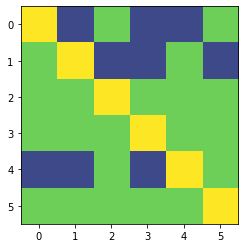

build these eight (bottom)


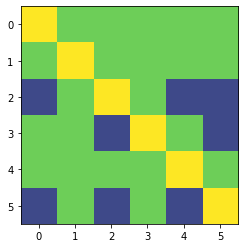

In [94]:
#These
example_nine = ['136.524', '125.346', '124.536', '126.453', '123.645', '126.534', '124.563', '125.634', '135.624']
#build these
EightBuildable = ['123.546', '123.654', '124.356', '124.365', '125.463', '126.435', '126.543', '136.425']

print("these nine cubes (top)")
displayCubes(example_nine)
print("build these eight (bottom)")
displayCubes(EightBuildable)


these cubes are Buildable:
['123.546', '123.654', '124.356', '124.365', '125.463', '126.435', '126.543', '136.425']
the original set of cubes


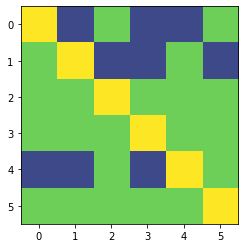

the set of buildable targets


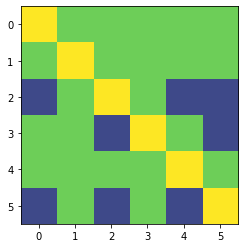

In [134]:
DisplaySetCubesandBuildableTargets(example_nine, C36)

these cubes are Buildable:
['123.456', '123.465', '123.546', '124.356', '124.536', '125.346', '125.634', '135.426']
the original set of cubes


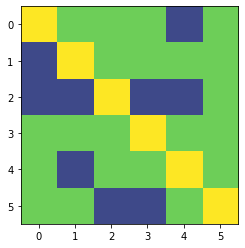

the set of buildable targets


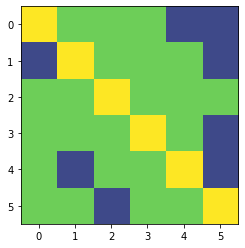

In [135]:
another9=['124.365', '124.536', '123.654', '125.436', '123.456', '125.346', '126.354', '123.546', '134.526']

DisplaySetCubesandBuildableTargets(another9, C36)